In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s313-newlambda2/20210617-1140/",
            "../checkpoints/s313-newlambda2/20210617-1144/",
            "../checkpoints/s313-newlambda2/20210617-1855/",
            "../checkpoints/s311-newlambda/20210617-1856/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                        baseline_rule-based   
ddqn_new                                           0   
lr                                              0.01   
batch_size                                       128   
lambda_rwd_mstpc                                 0.1   
lambda_rwd_energy                              5e-06   
energy_cons_in_kWh                                 0   
reward_offset                                    0.0   
clip_econs_at                                    0.0   
soften_instead_of_clipping                         0   
target_network_update_freq                         3   
epsilon_final_step                               100   
epsilon_decay_mode                       exponential   
episodes_count                                   100   
agent_init_gain                                  0.8   
use_layer_normalization                            0   
fewer_q_values                                     0   
agent_w_l2                                     1e-05   
network_storage_frequency                         10   
model                        Building_5ZoneAirCooled   
single_setpoint_agent_count                      all   
next_occ_horizont                                  0   

                                                               s313-newlambda2  \
algorithm                                                                 ddqn   
ddqn_new                                                                     1   
lr                                                                         0.1   
batch_size                                                                 256   
lambda_rwd_mstpc                                                          0.12   
lambda_rwd_energy                                                        0.004   
energy_cons_in_kWh                                                           1   
reward_offset                                                             0.15   
clip_econs_at                                                            150.0   
soften_instead_of_clipping                                                   1   
target_network_update_freq                                                   2   
epsilon_final_step                                                       12500   
epsilon_decay_mode                                                      linear   
episodes_count                                                             250   
agent_init_gain                                                            0.7   
use_layer_normalization                                                      1   
fewer_q_values                                                               1   
agent_w_l2                                                               1e-06   
network_storage_frequency                                                  250   
model                        Building_5ZoneAirCooled_SingleSetpoint_SingleA...   
single_setpoint_agent_count                                                all   
next_occ_horizont                                                            2   

                                                             s313-newlambda2_3  \
algorithm                                                                 ddqn   
ddqn_new                                                                     1   
lr                                                                         0.1   
batch_size                                                                 256   
lambda_rwd_mstpc                                                          0.12   
lambda_rwd_energy                                                        0.004   
energy_cons_in_kWh                                                           1   
reward_offset                                                             0.15   
clip_econs_at                                                            150.0   
soften_instead_of_clipping                          

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001  s313-newlambda2  \
Number of training episodes                      1.0     25000.000000   
Runtime in s                                     0.0    135940.215038   
Runtime in h                                     0.0        37.761171   
Mean episode runtime in s                        0.0         5.437609   
Mean episode runtime during eval. episode in s   0.0         5.427113   
Mean episode runtime after eval. episode in s    NaN         5.367502   
Mean episode runtime in no eval. episode in s    NaN         5.437651   

                                                s313-newlambda2  \
Number of training episodes                        25000.000000   
Runtime in s                                      139659.955453   
Runtime in h                                          38.794432   
Mean episode runtime in s                              5.586398   
Mean episode runtime during eval. episode in s         5.497916   
Mean episode runtime after eval. episode in s          5.483797   
Mean episode runtime in no eval. episode in s          5.586754   

                                                s313-newlambda2  \
Number of training episodes                        25000.000000   
Runtime in s                                      132285.305740   
Runtime in h                                          36.745918   
Mean episode runtime in s                              5.291412   
Mean episode runtime during eval. episode in s         5.236912   
Mean episode runtime after eval. episode in s          5.221100   
Mean episode runtime in no eval. episode in s          5.291631   

                                                s311-newlambda  
Number of training episodes                       25000.000000  
Runtime in s                                     132358.739632  
Runtime in h                                         36.766317  
Mean episode runtime in s                             5.294350  
Mean episode runtime during eval. episode in s        5.302194  
Mean episode runtime after eval. episode in s         5.217382  
Mean episode runtime in no eval. episode in s         5.294318

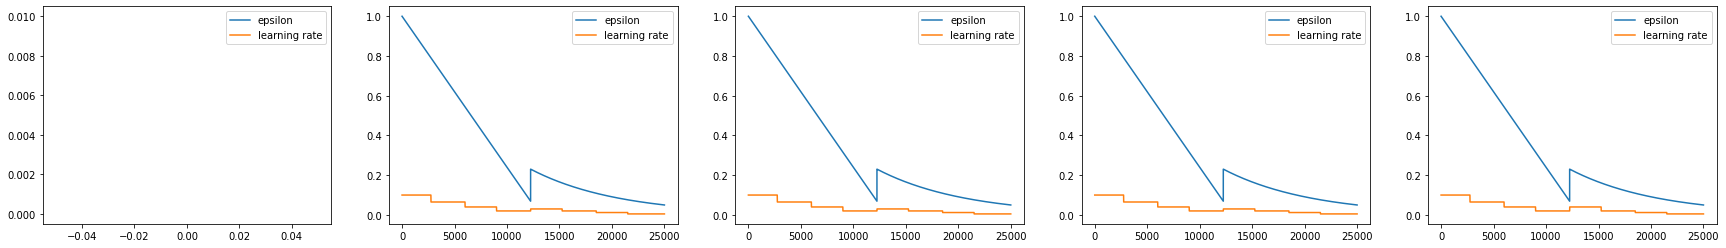

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

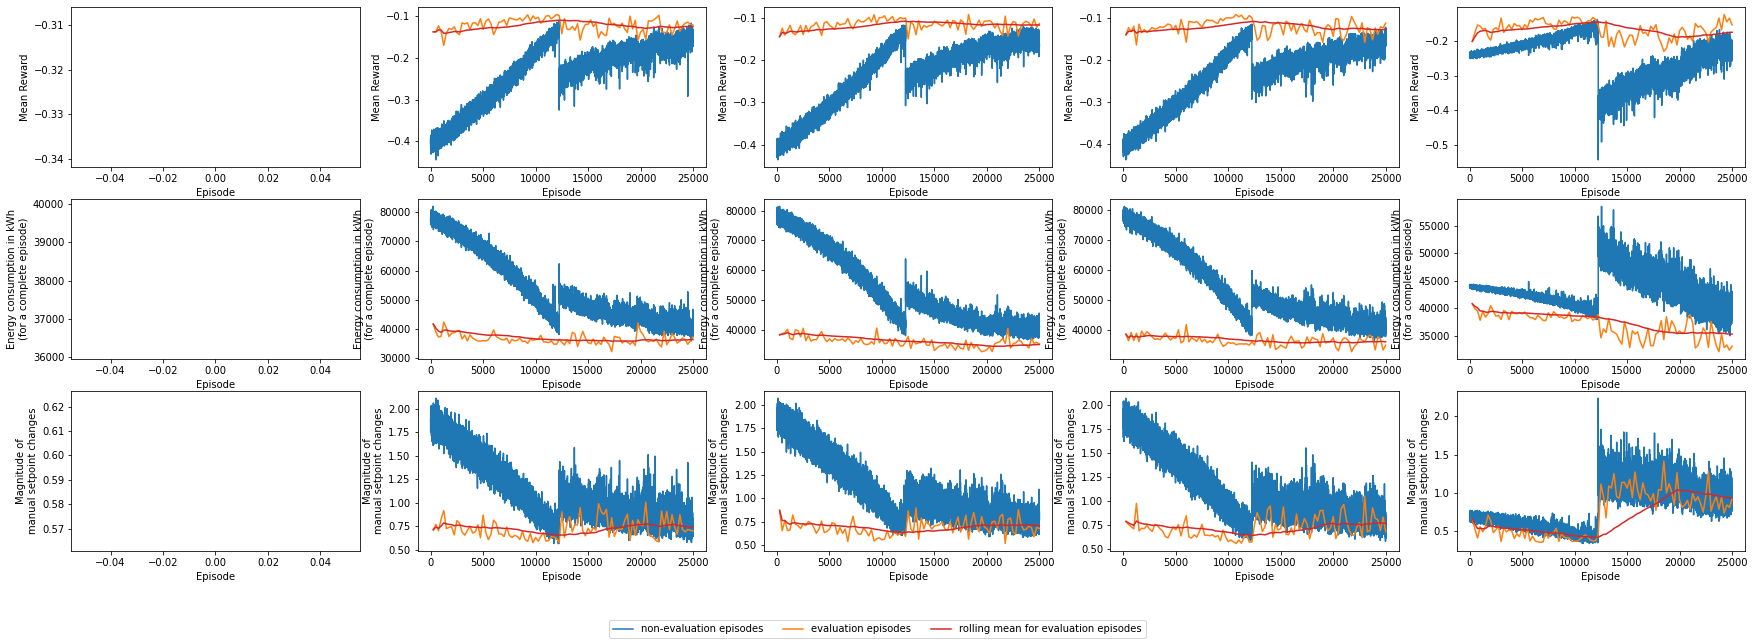

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

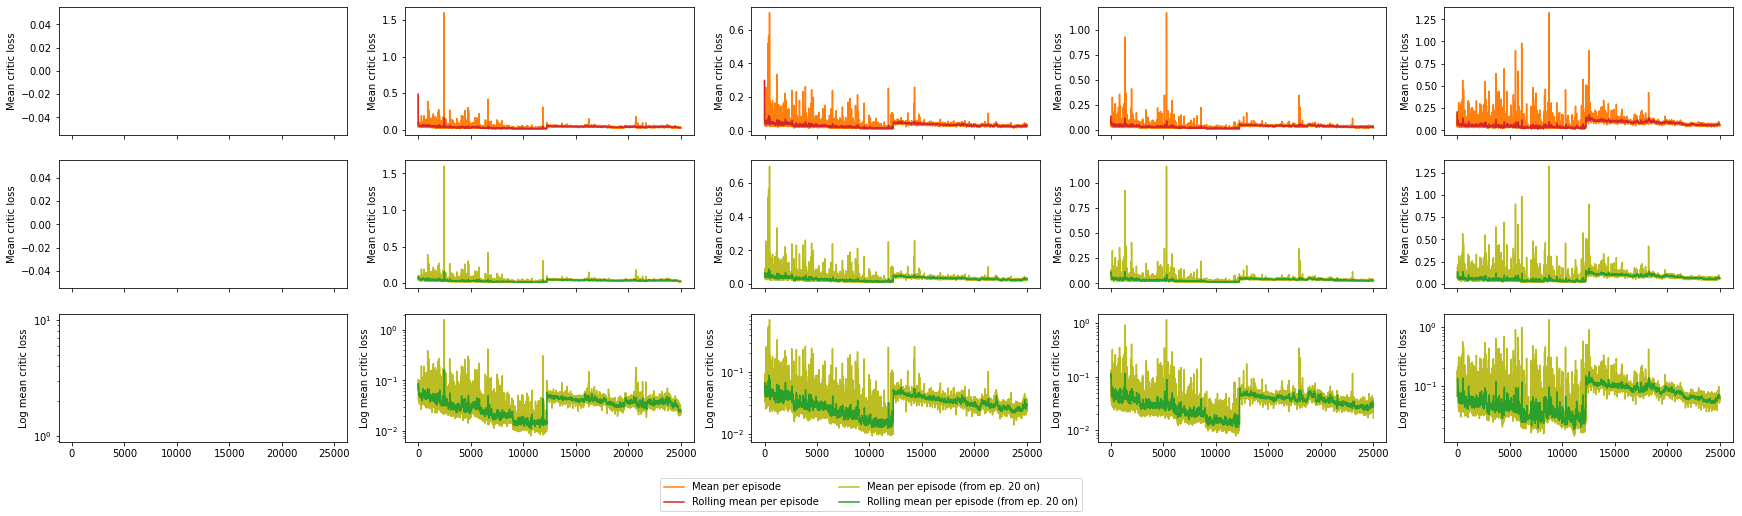

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  24999
Last available evaluation episode for dfs2:  24999
Last available evaluation episode for dfs3:  24999
Last available evaluation episode for dfs4:  24999


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   38042.14 kWh; Sum of setpoint change magnitudes: 426.88118883889297
For episode 24999: Energy consumption:   37274.58 kWh; Sum of setpoint change magnitudes: 501.88037036266195
For episode 24999: Energy consumption:   35267.17 kWh; Sum of setpoint change magnitudes: 487.26018035171006
For episode 24999: Energy consumption:   34823.56 kWh; Sum of setpoint change magnitudes: 489.88255222926927
For episode 24999: Energy consumption:   33087.58 kWh; Sum of setpoint change magnitudes: 663.7238928004716

Mean values for episode ...
...     0: Reward: -0.32392 kWh; Setpoint change magnit.:  0.59372; Energy cons.: 52909.78911
... 24999: Reward: -0.12125 kWh; Setpoint change magnit.:  0.69803; Energy cons.: 51842.25877
... 24999: Reward: -0.11315 kWh; Setpoint change magnit.:  0.67769; Energy cons.: 49050.30508
... 24999: Reward: -0.11151 kWh; Setpoint change magnit.:  0.68134; Energy cons.: 48433.32439
... 24999

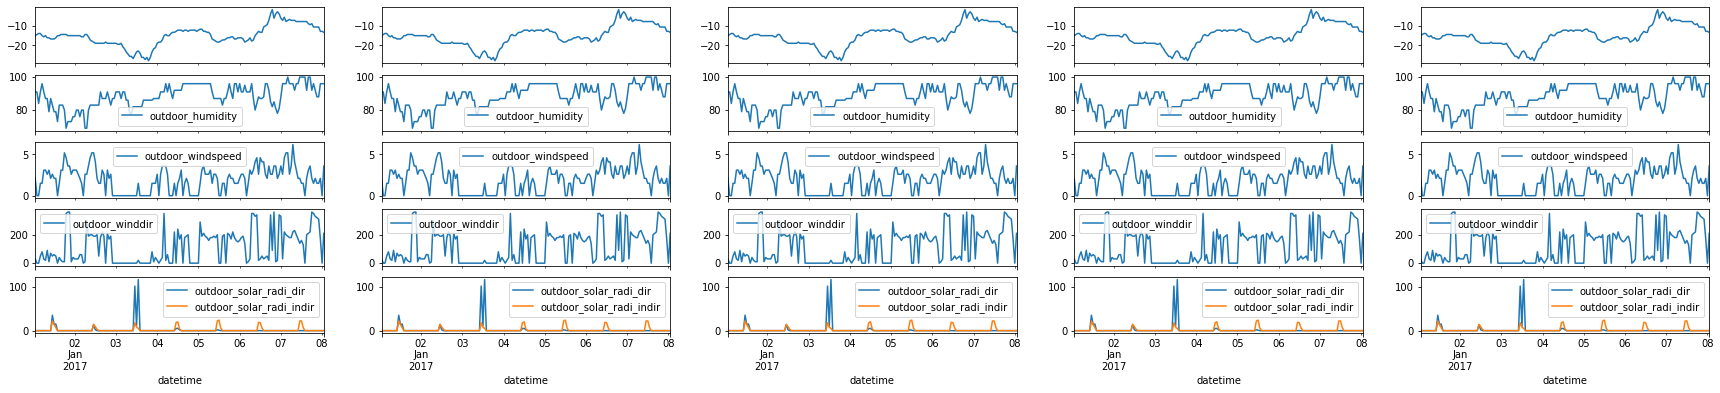

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs4: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs4: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4

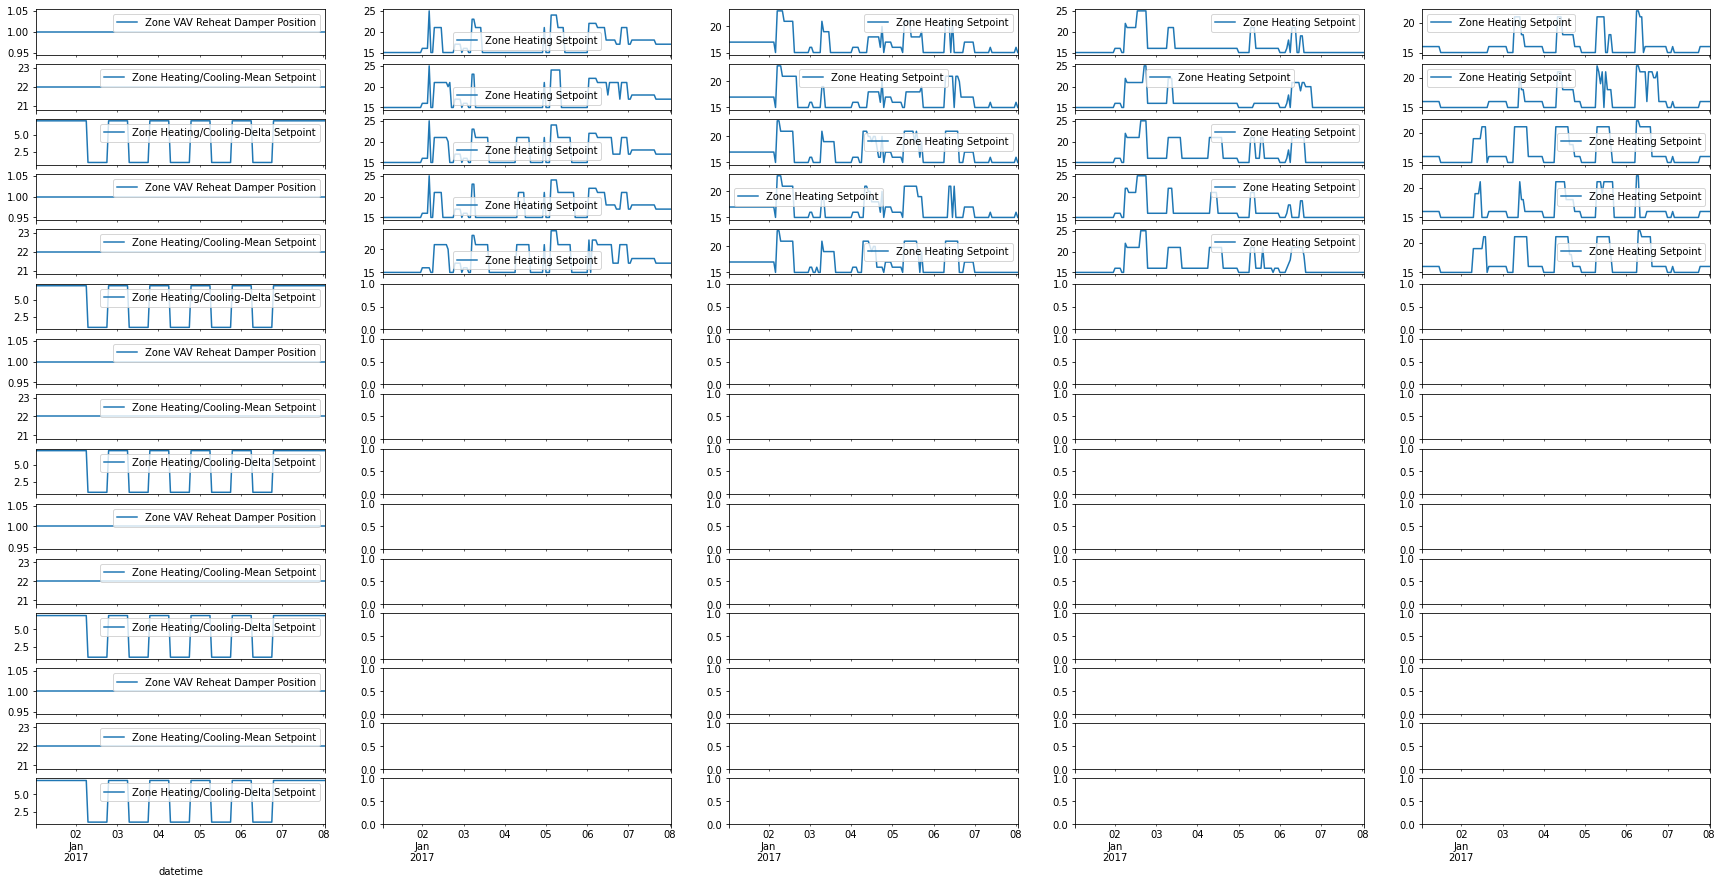

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

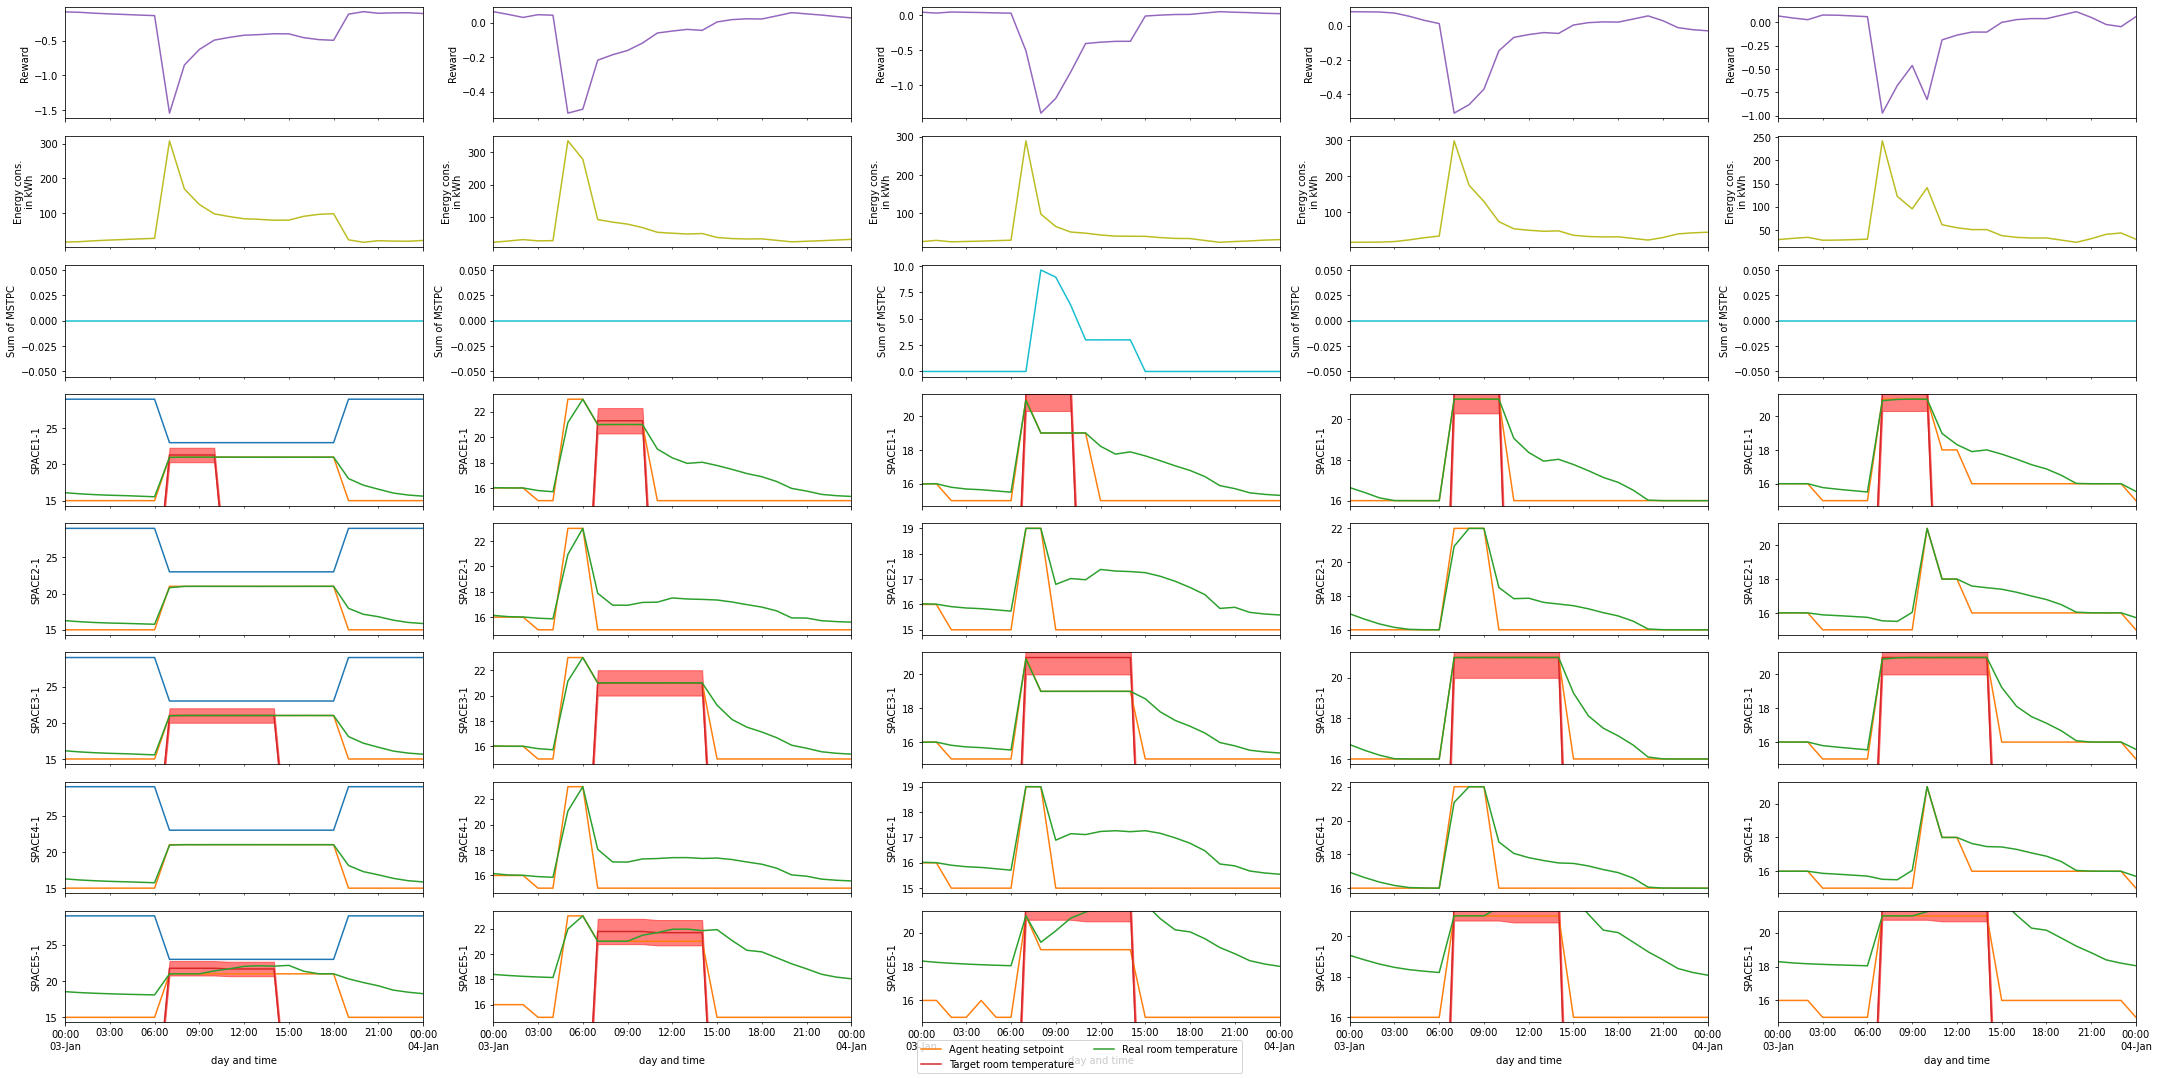

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

For plot number 1, mean energy consumption =  52002.0 Wh, mean reward = -0.3174
For plot number 2, mean energy consumption =  50985.1 Wh, mean reward = -0.1162
For plot number 3, mean energy consumption =  48294.7 Wh, mean reward = -0.1072
For plot number 4, mean energy consumption =  47131.2 Wh, mean reward = -0.1052
For plot number 5, mean energy consumption =  45431.9 Wh, mean reward = -0.1424


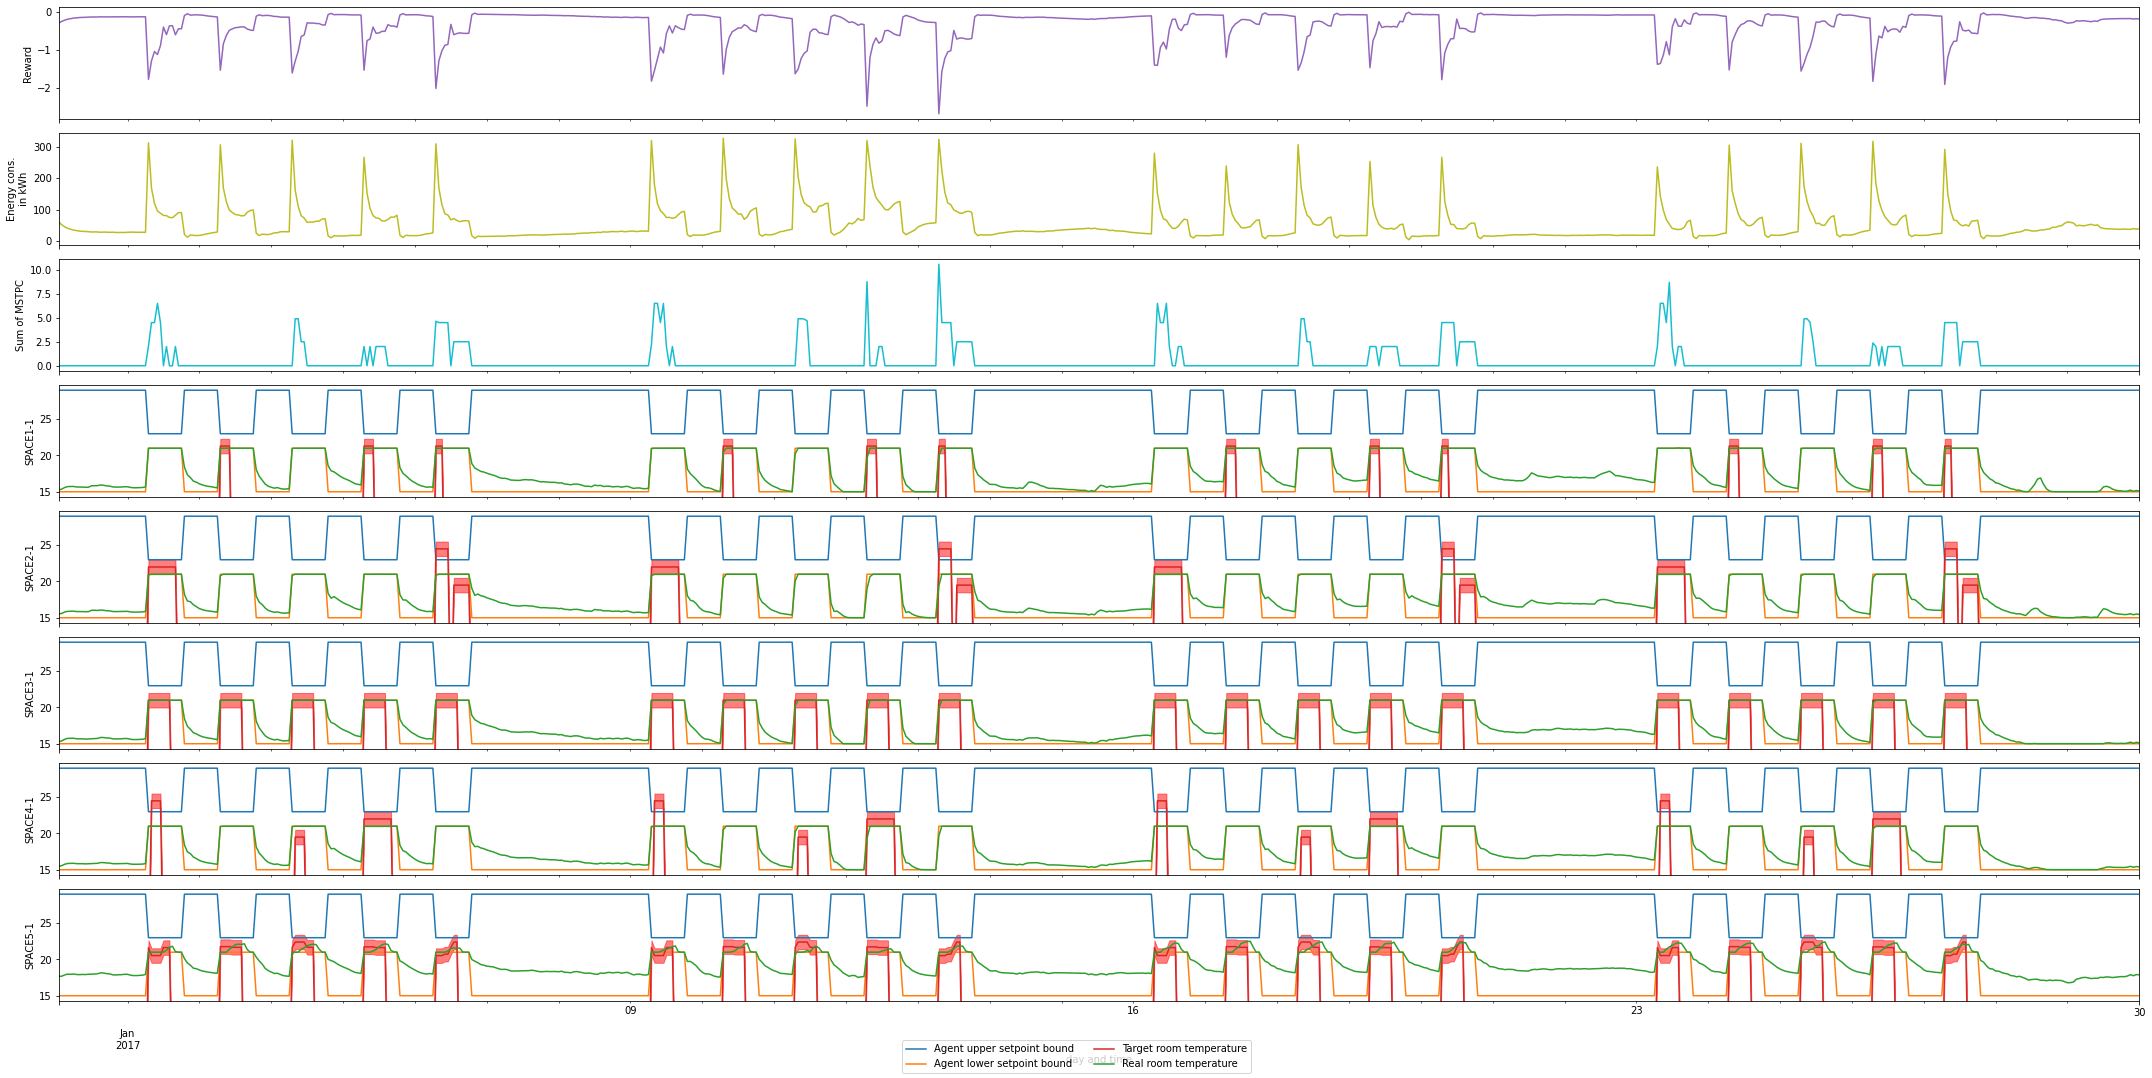

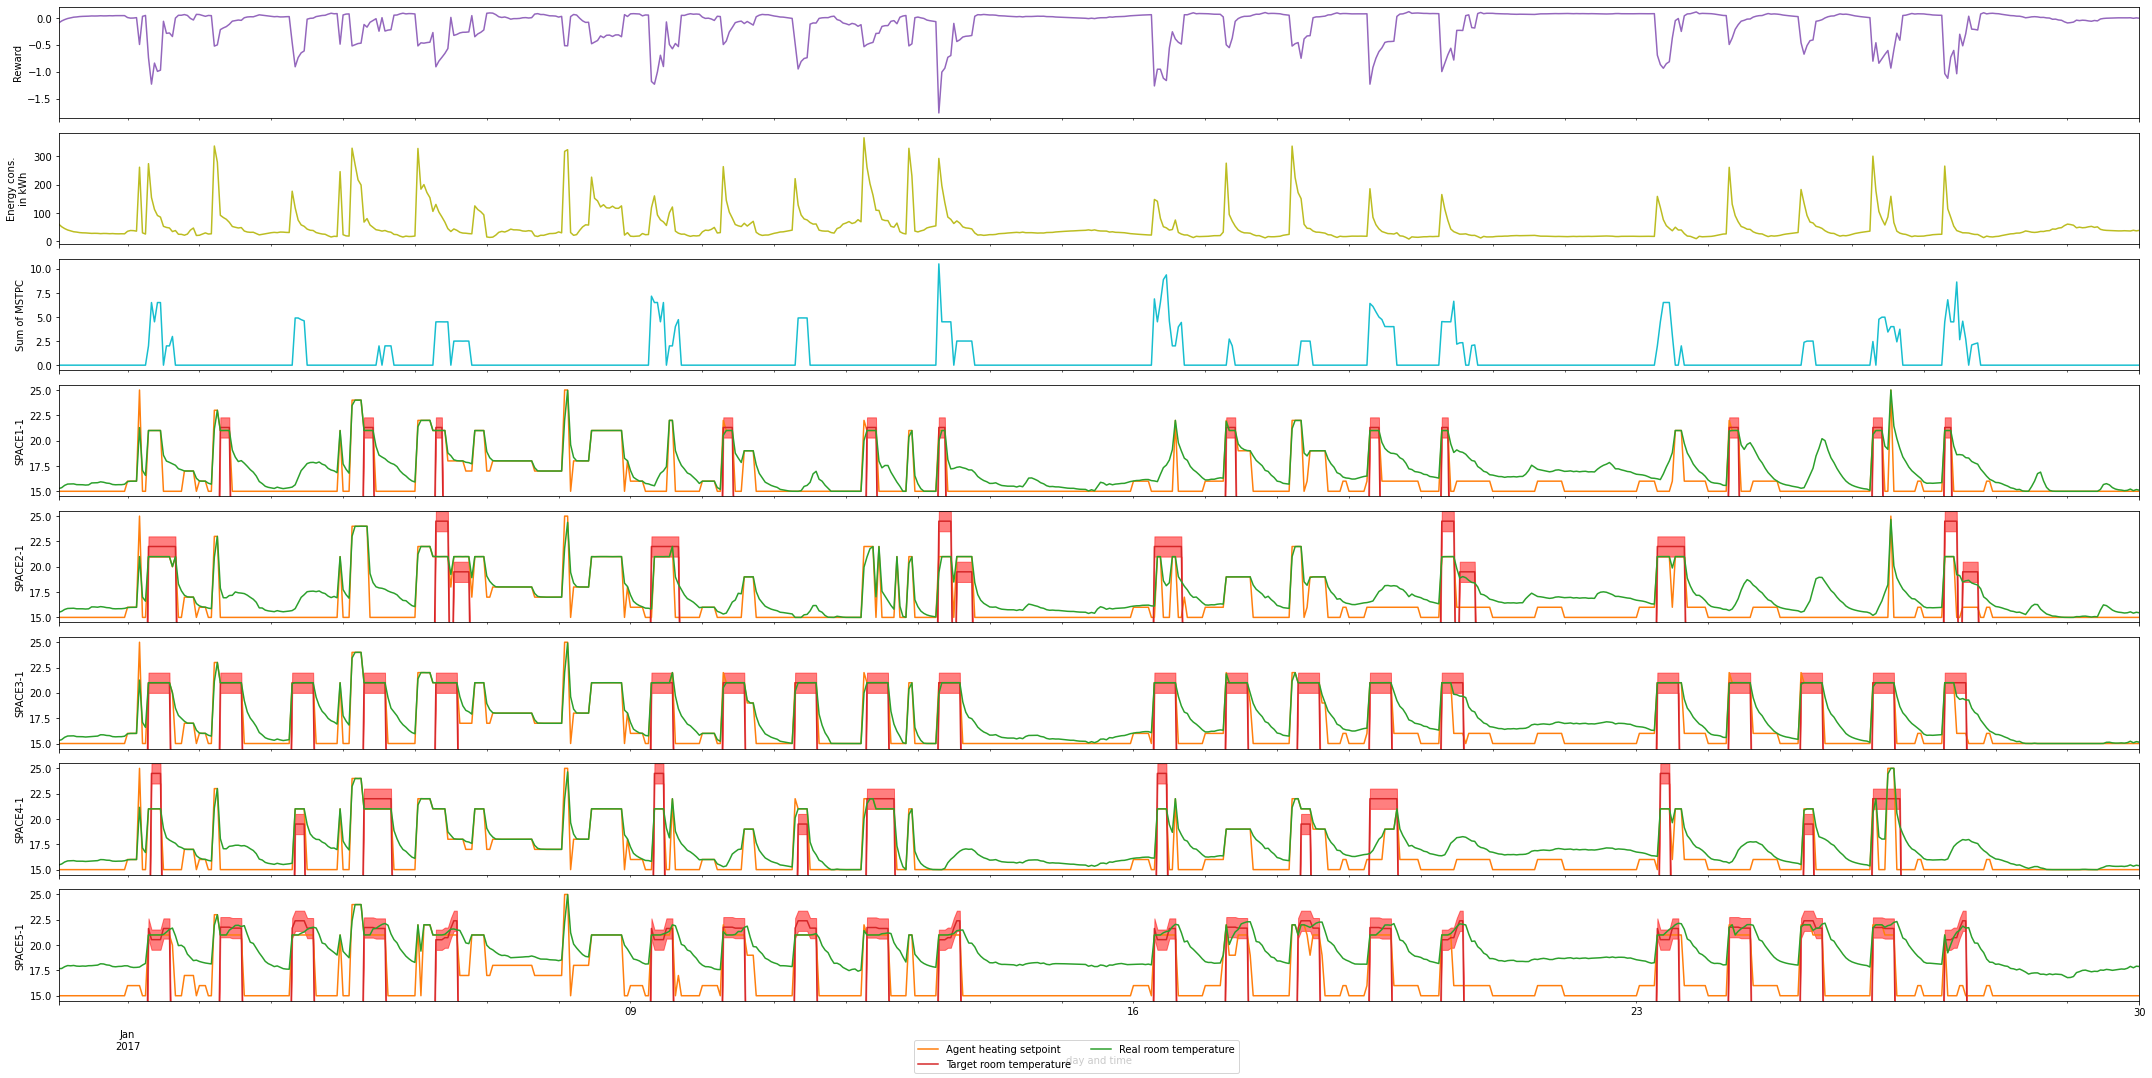

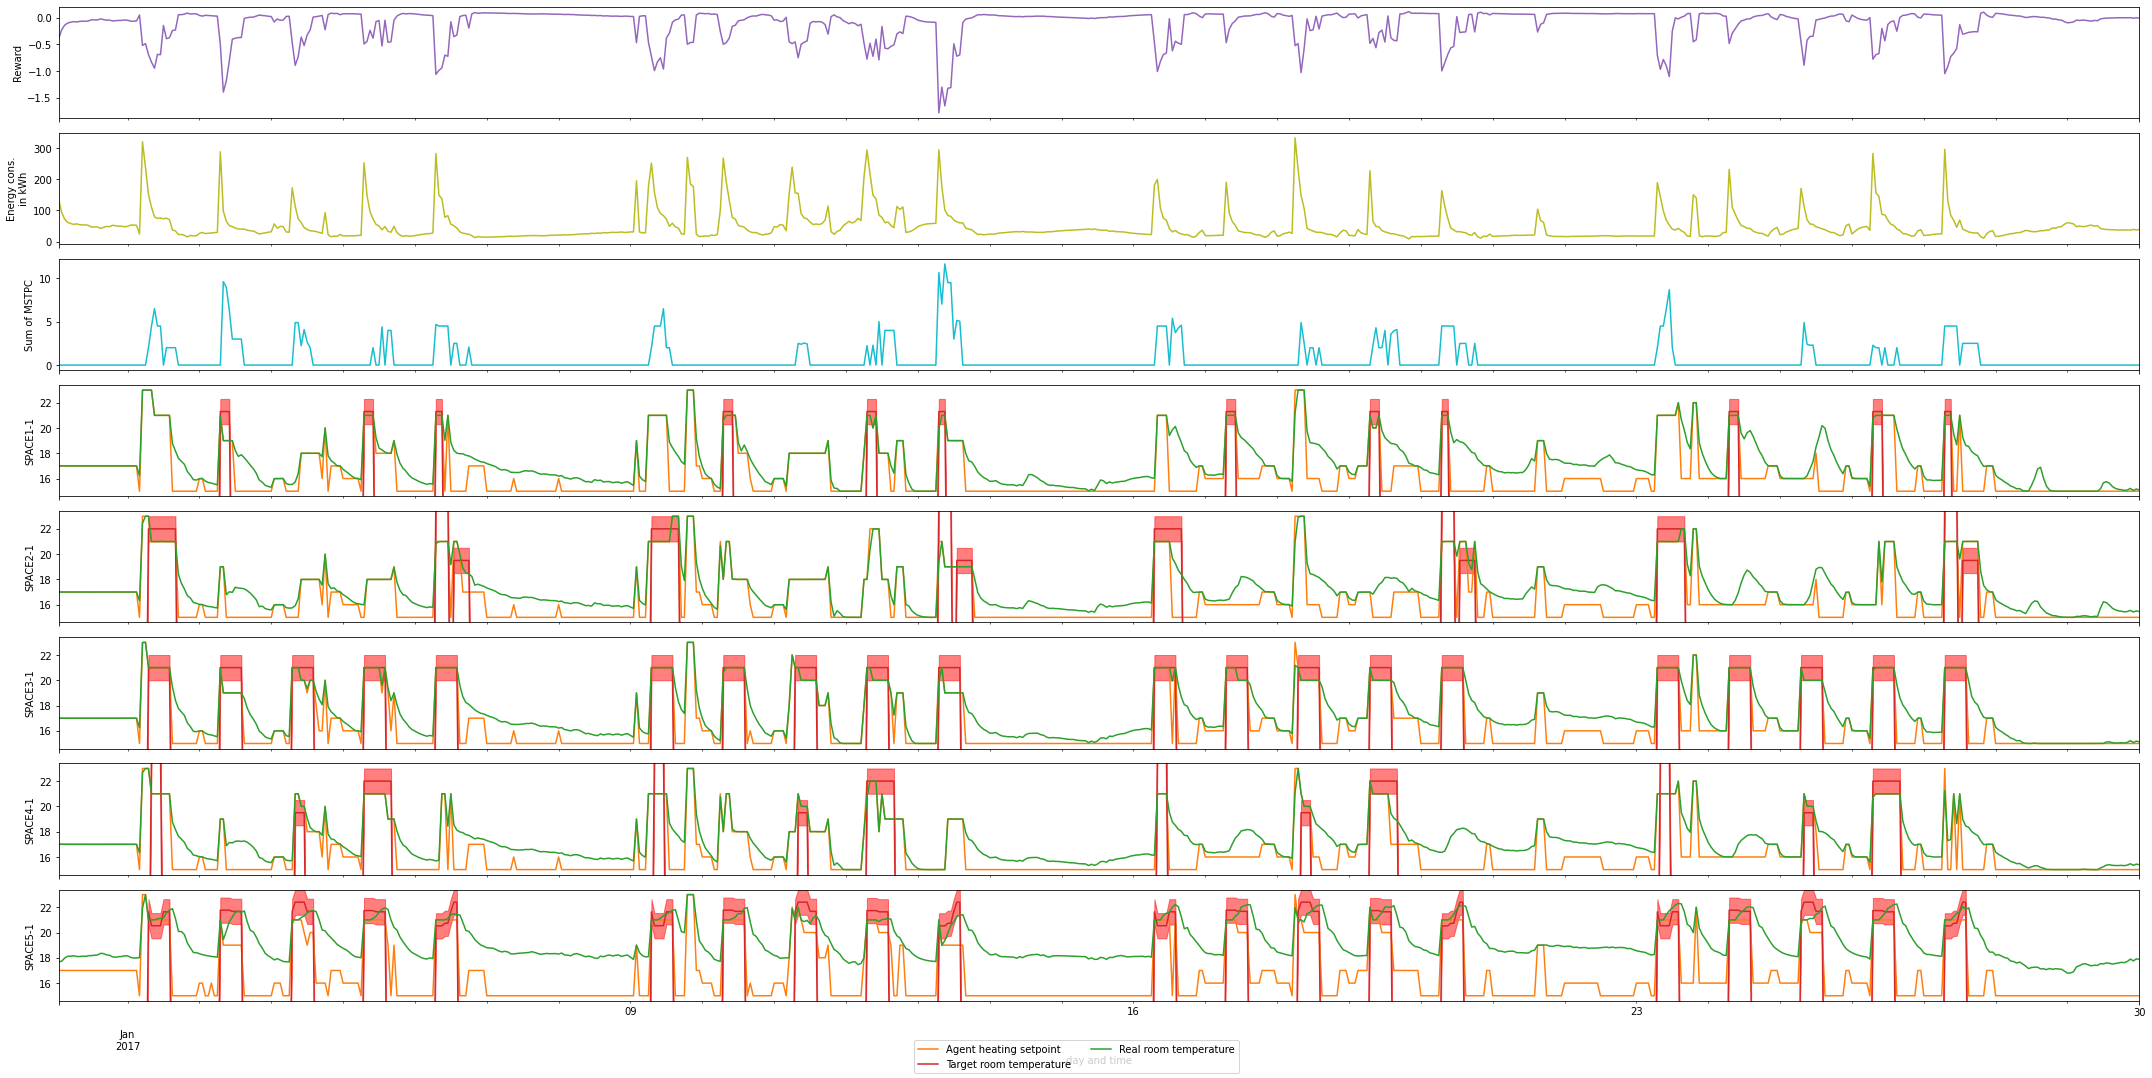

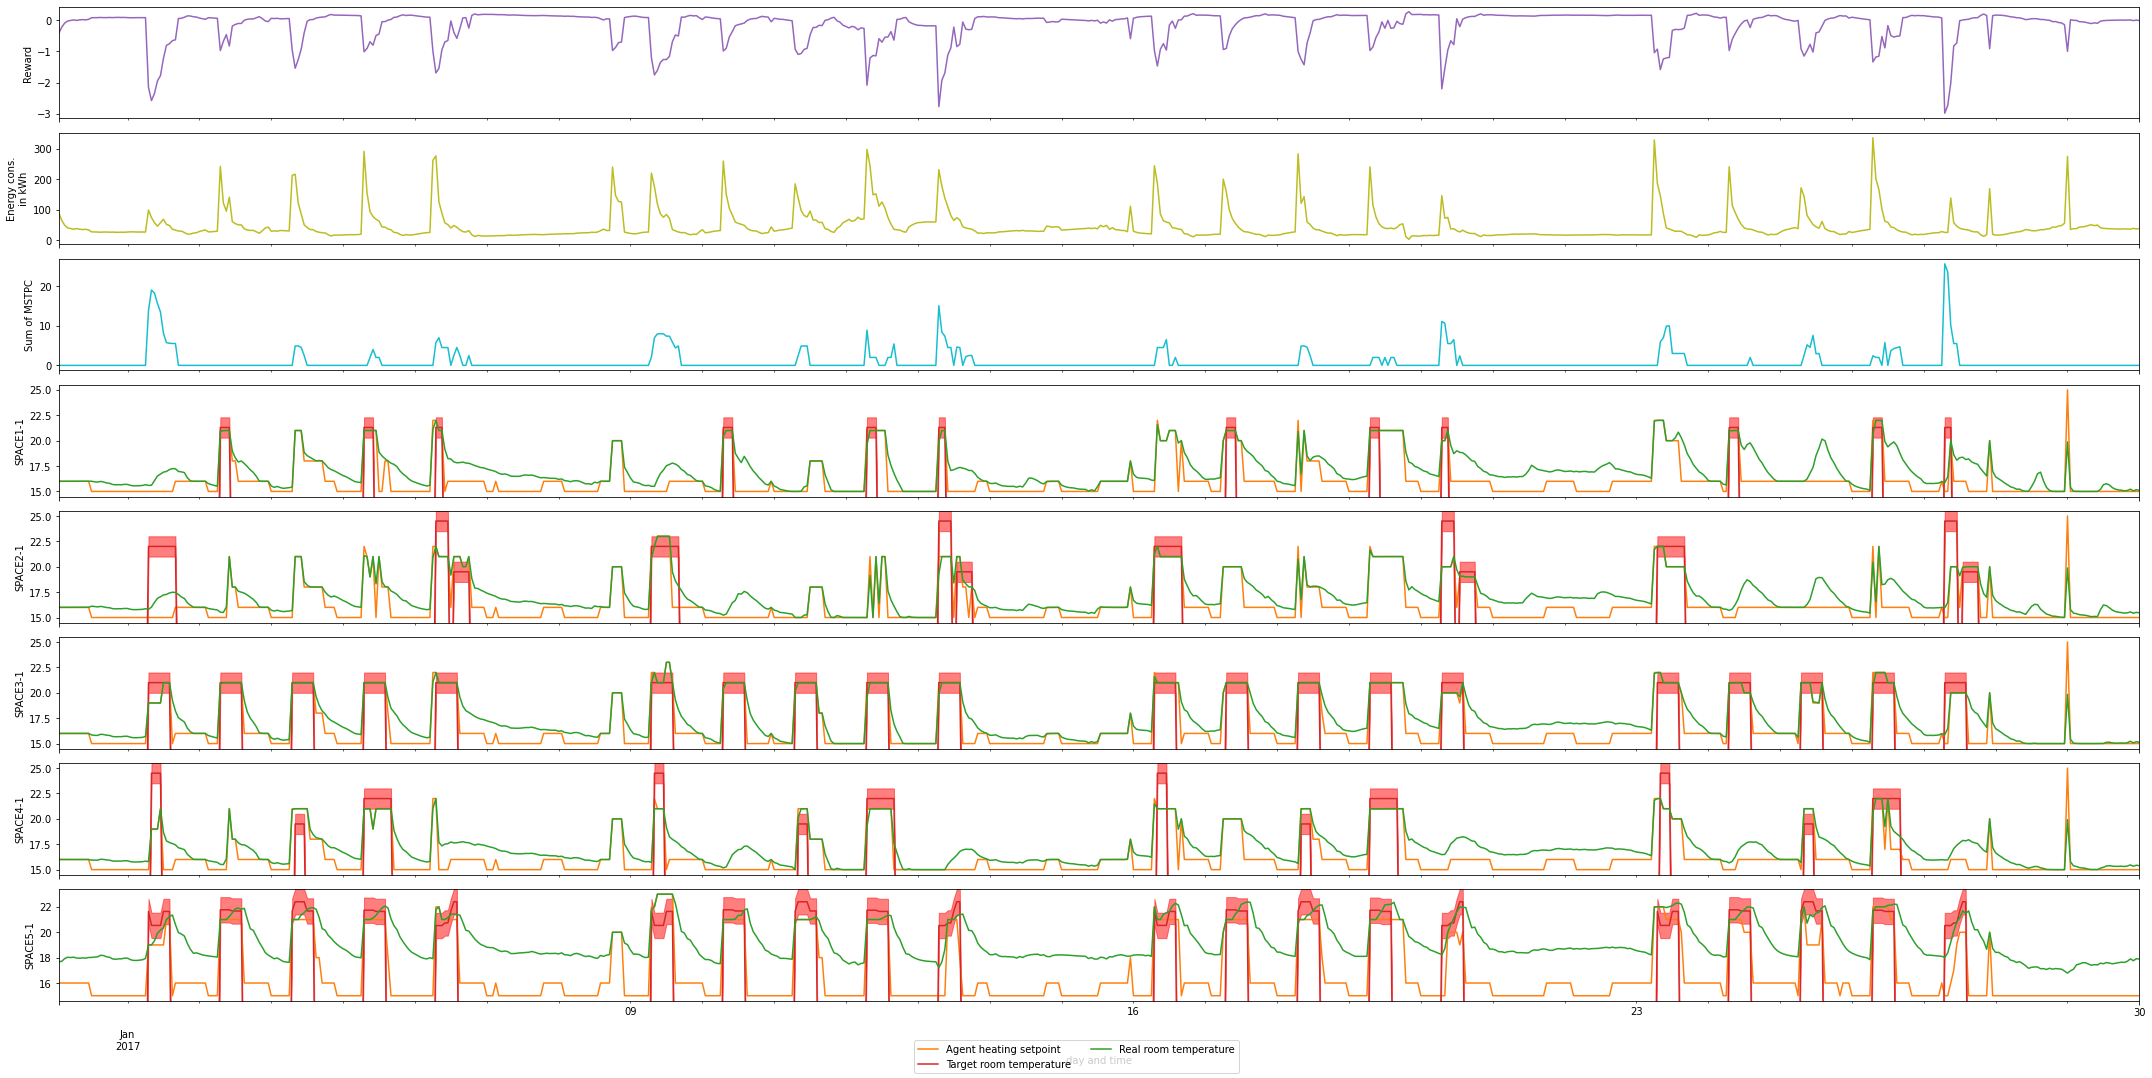

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

(<Figure size 2160x4320 with 40 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s313-newlambda2\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 1: s313-newlambda2\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 1: s313-newlambda2\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 1: s313-newlambda2\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 1: s313-newlambda2\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 2: s313-newlambda2\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s313-newlambda2\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 2: s313-newlambda2\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 2: s313-newlambda2\nAgent 3'>,
        <AxesSubplot:ylabel='Scenario 2: s313-newlambda2\nAgent 4'>,
        <AxesSubplot:ylabel='Scenario 3: s313-newlambda2\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 3: s313-newlambda2\nAgent 1'>,
        <AxesSubplot:ylabel='Scenario 3: s313-newlambda2\nAgent 2'>,
        <AxesSubplot:ylabel='Scenario 3: s313-newlambda2\nAgent 

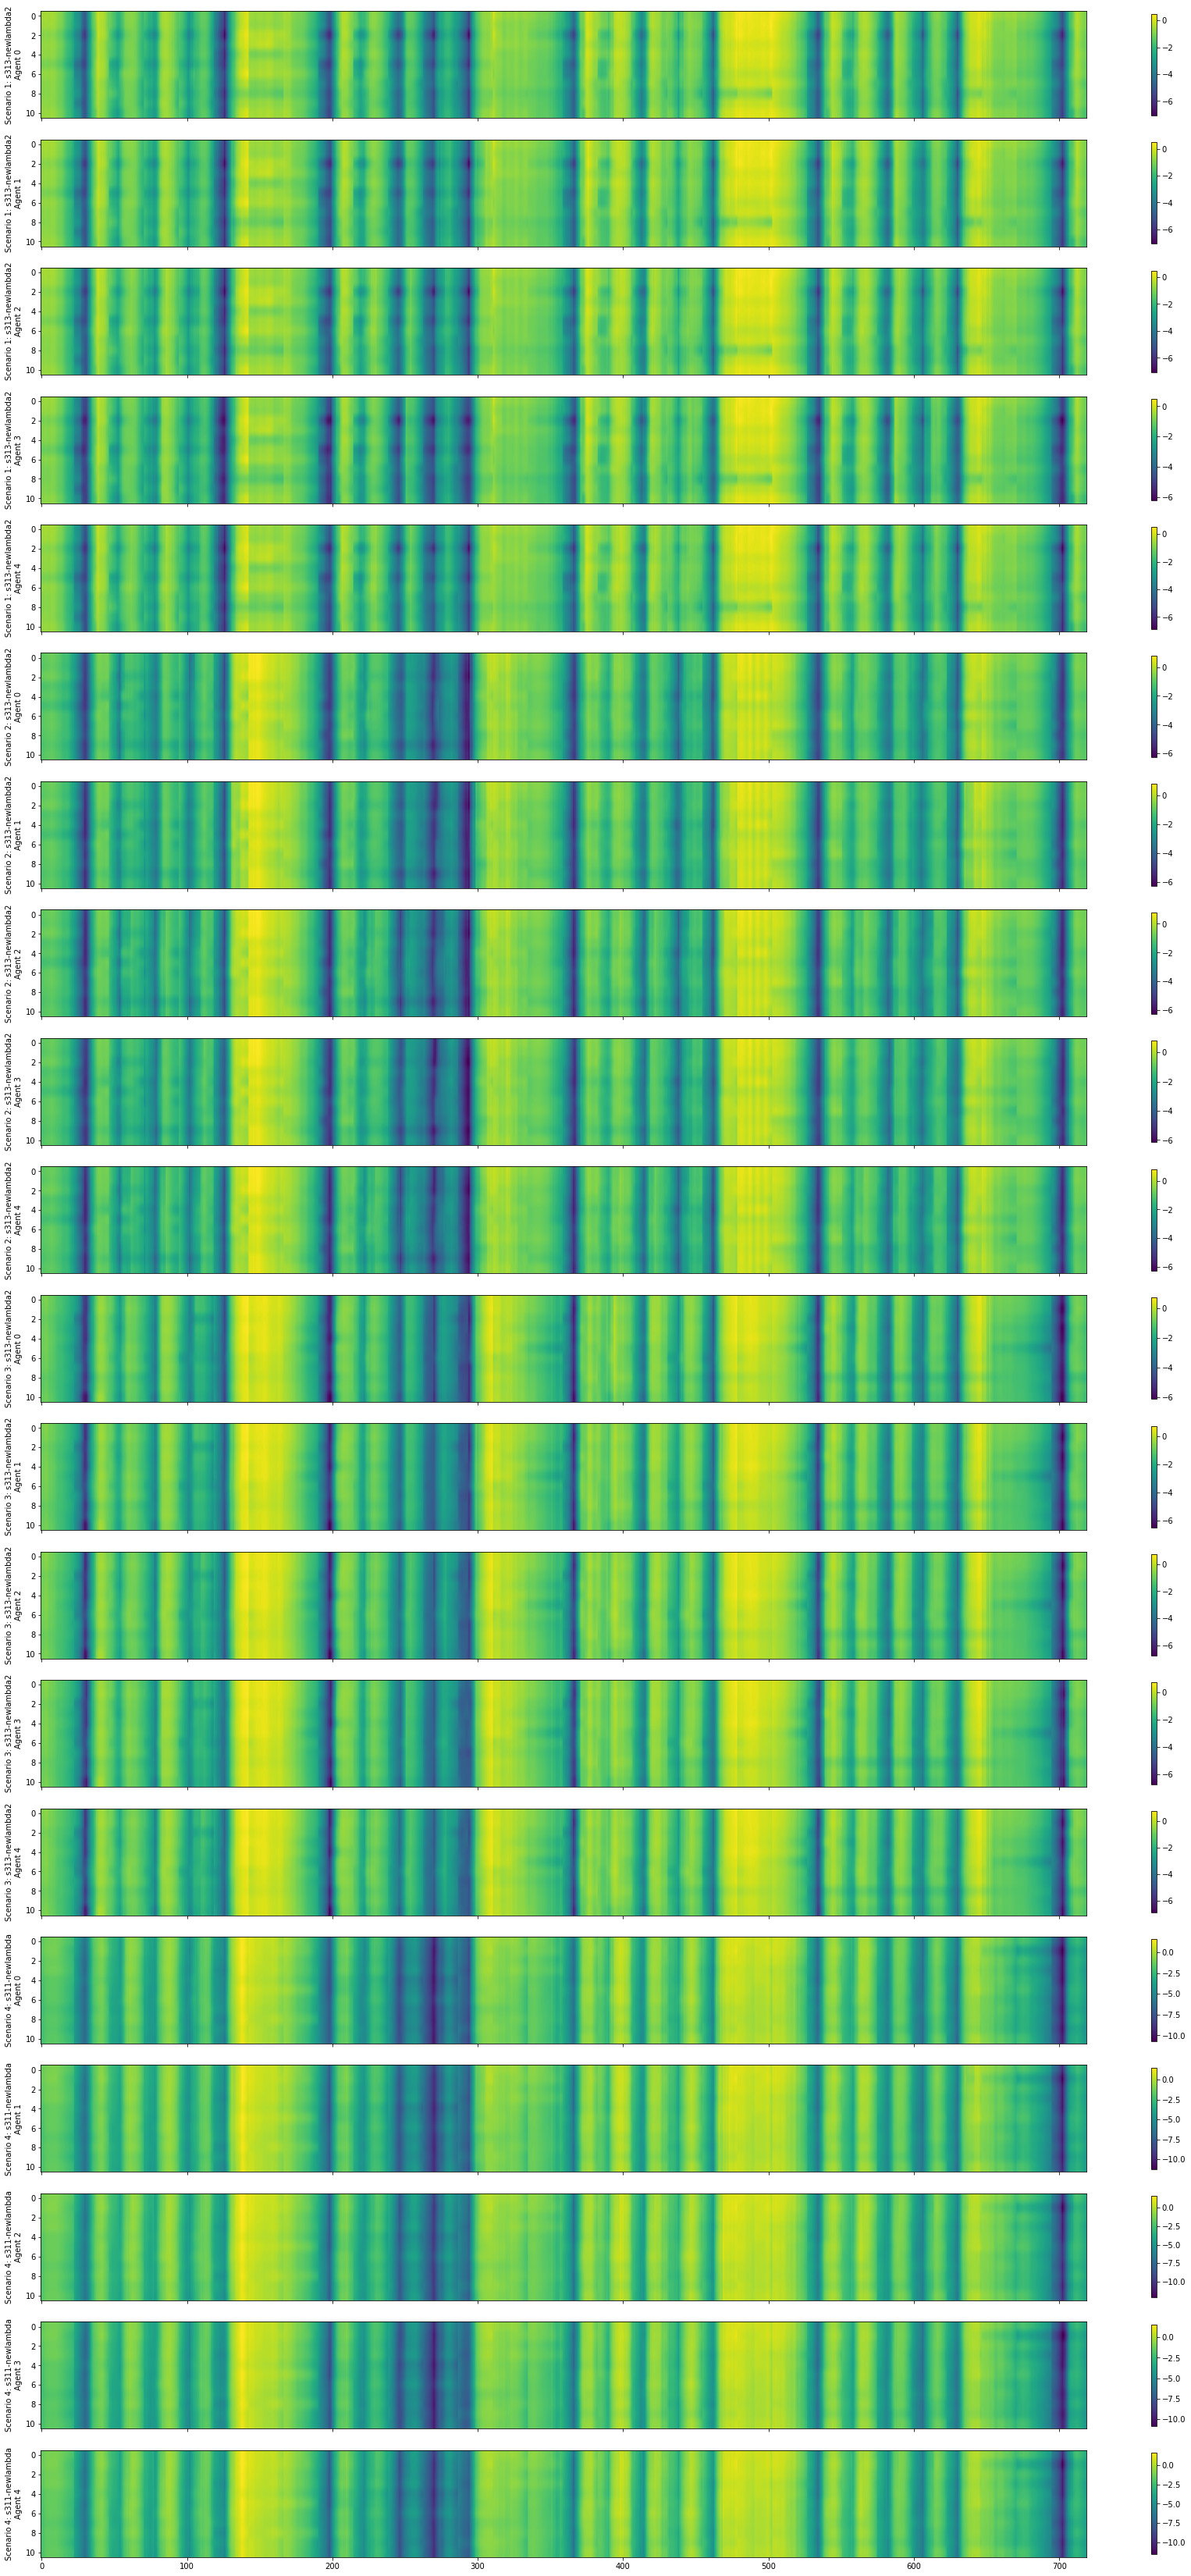

In [33]:
vh.plot_q_values(q_values, fig_width)